## Import libraries 

In [1]:
import numpy as np
import pandas as pd

## Data Work

In [2]:
laptops_data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv')

In [3]:
laptops_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [4]:
laptops_data.columns = laptops_data.columns.str.lower().str.replace(' ', '_')

In [5]:
laptops_data.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [14]:
laptops_data.shape

(2160, 12)

## EDA

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
%matplotlib inline

<Axes: xlabel='final_price', ylabel='Count'>

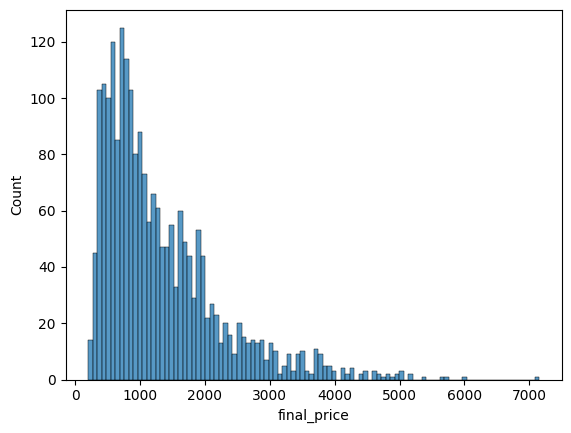

In [11]:
sns.histplot(laptops_data.final_price, bins = 100)

In [15]:
laptops_data = laptops_data[['ram','storage','screen', 'final_price']]

In [16]:
laptops_data.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [19]:
laptops_data['ram'].median() #16 is the median

np.float64(16.0)

## Preparing dataset

In [20]:
n = int(len(laptops_data))

In [35]:
n_test = n_val = int(n*0.2 )

In [36]:
n_train = n- n_val - n_test

In [28]:
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx) 

In [32]:
idx

array([2079,  668, 2073, ..., 1130, 1294,  860], shape=(2160,))

In [37]:
df_train = laptops_data.iloc[idx[:n_train]] 
df_val = laptops_data.iloc[idx[n_train : n_train + n_val]]
df_test = laptops_data.iloc[idx[n_train+n_val :]] 

In [38]:
df_train

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00
...,...,...,...,...
1777,8,256,14.0,549.00
183,32,1000,16.0,1999.00
137,16,512,15.6,1059.00
899,16,512,14.0,1671.00


In [39]:
## Preparing for linear regression - screen as 0 when null
df_train


,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
